## Appendix Figure A3: Count of schools' financier alumni in Forbes 400 by schools' rejection rates

### From Elite Embeddedness

By Charlie Eaton and Albina Gibadullina

In [1]:
use data/d_school_level_elite_embed.dta, clear
keep if year==2003 | year==2017
set scheme plotplain

(795 observations deleted)


In [2]:
gen typeyear2=3 if schooltypenum==2 & year==2003
replace typeyear2=1 if schooltypenum==3 & year==2003
replace typeyear2=4 if schooltypenum==2 & year==2017
replace typeyear2=2 if schooltypenum==3 & year==2017
label define typeyear2 3 "Public 2003" 1 "Private 2003" ///
4 "Public 2017" 2 "Private 2017"
label val typeyear2 typeyear2

qui gen pctunderfirst= tefraceunder/teftotlt

qui gen endow_assets_c_log=log(endowment_assets / cpi_scalar_2017)
qui gen logtotal03_revenue=log(total03_revenue / cpi_scalar_2017)
qui gen logfte_count=log(teftotlt)

qui egen boardcount=rowtotal(pehedge otherfinance nonfinance)
qui gen pctalt= pehedge/boardcount * 100

(86 missing values generated)
(26 real changes made)
(30 real changes made)
(30 real changes made)


In [3]:
*gen rejectrate=(1-acceptrate)*100
label var rejectrate "admissions selectivity (rejection rate)"
label var endow_assets_c_log "Endowment assets (log 2017 $)"
label var logtotal03_revenue "University revenue (log 2017 $)"
label var logfte_count "FTE students (log)"
label var fgrnt_p "% students low-income"
label var pctunderfirst "% students racially underrepresented"

In [4]:
%set graph_width = 4

graph size was (5.5in, 4in), is now (4, 4in).


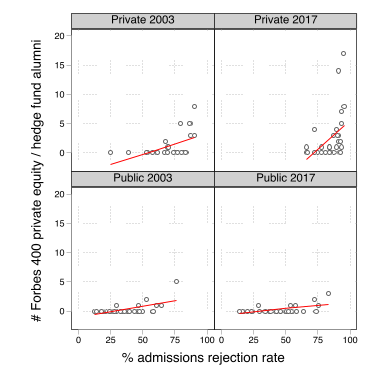

In [5]:
tw (scatter alumnipehedge rejectrate, msym(O) mfc(white)) ///
	(lfit alumnipehedge rejectrate, sort lp(l) lc(red)), /// 
		by(typeyear2, compact row(2) legend(off) note("")) ///
		ytitle("# Forbes 400 private equity / hedge fund alumni") ///
		xtitle("% admissions rejection rate") ///
		xlab(0(25)100) ylab(0(5)20)  ///
		xsize(4) aspect(1) name(alt_accep, replace) 

In [6]:
graph export figures/fa3_forbes_fin_alumni_rejection.pdf, replace

file figures/fa3_forbes_fin_alumni_rejection.pdf saved as PDF format


## Below we estimate and report regression coefficients and standard erros for the fitted lines shown above. The code below is also provided in the ta3 Notebook for Appendix Table 3 where we report these results. The estimates show that the fitted line coefficients are statistically significant.

In [7]:
est clear
qui eststo: reg alumnipehedge rejectrate if schooltypenum==3 & year==2003, cluster(unitid) ro

qui eststo: reg alumnipehedge rejectrate if schooltypenum==3 & year==2017, cluster(unitid) ro

qui eststo: reg alumnipehedge rejectrate if schooltypenum==2 & year==2003, cluster(unitid) ro

qui eststo: reg alumnipehedge rejectrate if schooltypenum==2 & year==2017, cluster(unitid) ro

In [8]:
set line 155
esttab, type cells(b(star fmt(3)) se(par fmt(3))) stardetach ///
label collabels(none) ///
starlevels(^ .1 * .05 ** .01 *** .001) eqlabels(none) ///
stats(r2 N_clust N, fmt(2 2 0 0) label(R-square Schools N)) ///
mlabel("priv 2003" "priv 2017" "pub 2003" "pub 2017" "all w/ interaction")


----------------------------------------------------------------------------------------
                              (1)              (2)              (3)              (4)    
                        priv 2003        priv 2017         pub 2003         pub 2017    
----------------------------------------------------------------------------------------
admissions selecti~o        0.070 *          0.202 *          0.036 ^          0.021 *  
                          (0.027)          (0.076)          (0.018)          (0.009)    
Constant                   -3.726 *        -14.529 *         -0.950 ^         -0.628 ^  
                          (1.712)          (5.962)          (0.534)          (0.350)    
----------------------------------------------------------------------------------------
R-square                     0.26             0.19             0.35             0.29    
Schools                     26.00            30.00            29.00            30.00    
N                   

## Below we report rejection rates and Forbes 400 PE and Hedge fund alumni counts by school in 2003 and 2017, the raw data for the scatter plots above.

In [9]:
gsort year -schooltypenum schoolname
list schoolname rejectrate alumnipehedge unitid if year==2017 & schooltypenum==3


     +----------------------------------------------------------------------+
     |                            schoolname   reject~e   alumni~e   unitid |
     |----------------------------------------------------------------------|
 56. |                     boston university   74.89026          0   164988 |
 57. |                   brandeis university   65.77937          0   165015 |
 58. |                      brown university    91.5075          0   217156 |
 59. |    california institute of technology   92.26053          0   110404 |
 60. |            carnegie mellon university   77.80163          1   211440 |
     |----------------------------------------------------------------------|
 61. |       case western reserve university   66.88338          0   201645 |
 62. |                   columbia university   93.39157          7   190150 |
 63. |                    cornell university   87.32541          3   190415 |
 64. |                     dartmouth college   89.55328        

In [10]:
gsort year -schooltypenum schoolname
list schoolname rejectrate alumnipehedge unitid if year==2003 & schooltypenum==3


     +----------------------------------------------------------------------+
     |                            schoolname   reject~e   alumni~e   unitid |
     |----------------------------------------------------------------------|
  1. |    california institute of technology   83.06741          0   110404 |
  2. |            carnegie mellon university   61.56079          0   211440 |
  3. |       case western reserve university   24.67949          0   201645 |
  4. |                   columbia university    86.4191          5   190150 |
  5. |                    cornell university   69.01326          1   190415 |
     |----------------------------------------------------------------------|
  6. |                     dartmouth college   81.82201          0   182670 |
  7. |                       duke university    76.8434          0   198419 |
  8. |                      emory university    57.6872          0   139658 |
  9. |                 georgetown university   77.26978        

In [11]:
set line 200
gsort -year schooltypenum schoolname
list schoolname rejectrate alumnipehedge unitid if year==2017 & schooltypenum==2


     +----------------------------------------------------------------------------+
     |                                  schoolname   reject~e   alumni~e   unitid |
     |----------------------------------------------------------------------------|
  1. |                        arizona state system   16.42169          0   104179 |
  2. |                    florida state university   50.80942          0   134097 |
  3. |                   georgia university system     45.988          0   139959 |
  4. |                   indiana university system    23.9896          0   151351 |
  5. |                  maryland university system   55.49791          0   163286 |
     |----------------------------------------------------------------------------|
  6. |                   michigan state university   28.45088          1   171100 |
  7. |                       ohio state university   51.94006          0   204796 |
  8. |               pennsylvania state university   49.68636          0   

In [12]:
set line 200
gsort year schooltypenum schoolname
list schoolname rejectrate alumnipehedge unitid if year==2003 & schooltypenum==2


     +----------------------------------------------------------------------------+
     |                                  schoolname   reject~e   alumni~e   unitid |
     |----------------------------------------------------------------------------|
  1. |                    florida state university   35.53347          0   134097 |
  2. |                   georgia university system   24.78625          0   139959 |
  3. |                   indiana university system   18.87456          0   151351 |
  4. |                  maryland university system   57.33179          0   163286 |
  5. |                   michigan state university    29.1635          1   171100 |
     |----------------------------------------------------------------------------|
  6. |                       ohio state university   27.96938          0   204796 |
  7. |               pennsylvania state university   43.38502          0   214777 |
  8. |            purdue university west lafayette   21.33002          0   